**Import Suitable Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from google.colab import drive
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Load and Import Datasets**

In [ ]:
# Mount Google Drive if the datasets are stored there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the path to your datasets
fake_path = '/content/drive/MyDrive/WID3014_Final_Assessment/Fake.csv'
true_path = '/content/drive/MyDrive/WID3014_Final_Assessment/True.csv'

# Load datasets into pandas dataframes
fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

# Display the shape of each dataset
print("Shape of Fake Dataset:", fake_df.shape)
print("Shape of True Dataset:", true_df.shape)
print()

# Display first few rows of each dataset
print("Fake News Dataset:")
print(fake_df.head(5))
print("\nTrue News Dataset:")
print(true_df.head(5))
print()

# Display basic information about each dataset
print("Fake News Dataset Info:")
fake_df.info()
print("\nTrue News Dataset Info:")
true_df.info()

Shape of Fake Dataset: (23481, 4)
Shape of True Dataset: (21417, 4)

Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

True News Dataset:
                                

**Clean the Data**

In [ ]:
# Check for missing values
print("Fake News Missing Values:")
print(fake_df.isnull().sum())
print("\nTrue News Missing Values:")
print(true_df.isnull().sum())

# Check for duplicates
print("\nFake News Duplicates:")
print(fake_df.duplicated().sum())
print("\nTrue News Duplicates:")
print(true_df.duplicated().sum())


Fake News Missing Values:
title      0
text       0
subject    0
date       0
dtype: int64

True News Missing Values:
title      0
text       0
subject    0
date       0
dtype: int64

Fake News Duplicates:
3

True News Duplicates:
206


In [ ]:
# Create a copy of the datasets
fake_df_cleaned = fake_df.copy()
true_df_cleaned = true_df.copy()

# Remove duplicates from the copied datasets
fake_df_cleaned = fake_df_cleaned.drop_duplicates()
true_df_cleaned = true_df_cleaned.drop_duplicates()

# Verify the removal
print("Fake News Duplicates in Cleaned dataset:", fake_df_cleaned.duplicated().sum())
print("True News Duplicates in Cleaned dataset:", true_df_cleaned.duplicated().sum())
print()

# Display the shape of each clean dataset
print("Shape of Cleaned Fake Dataset:", fake_df_cleaned.shape)
print("Shape of Cleaned True Dataset:", true_df_cleaned.shape)


Fake News Duplicates in Cleaned dataset: 0
True News Duplicates in Cleaned dataset: 0

Shape of Cleaned Fake Dataset: (23478, 4)
Shape of Cleaned True Dataset: (21211, 4)


In [ ]:
# NLP Data Pre-processing Steps

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Tokenization, removing stop words, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply text pre-processing to 'title' and 'text' columns of fake news dataset
fake_df_cleaned['title'] = fake_df_cleaned['title'].apply(preprocess_text)
fake_df_cleaned['text'] = fake_df_cleaned['text'].apply(preprocess_text)

# Apply tokenization and lemmatization to 'title' and 'text' columns of fake news dataset
fake_df_cleaned['title'] = fake_df_cleaned['title'].apply(tokenize_and_lemmatize)
fake_df_cleaned['text'] = fake_df_cleaned['text'].apply(tokenize_and_lemmatize)

# Apply text pre-processing to 'title' and 'text' columns of true news dataset
true_df_cleaned['title'] = true_df_cleaned['title'].apply(preprocess_text)
true_df_cleaned['text'] = true_df_cleaned['text'].apply(preprocess_text)

# Apply tokenization and lemmatization to 'title' and 'text' columns of true news dataset
true_df_cleaned['title'] = true_df_cleaned['title'].apply(tokenize_and_lemmatize)
true_df_cleaned['text'] = true_df_cleaned['text'].apply(tokenize_and_lemmatize)

# Apply text pre-processing to 'subject' columns of fake and true news datasets
fake_df_cleaned['subject'] = fake_df_cleaned['subject'].apply(preprocess_text)
true_df_cleaned['subject'] = true_df_cleaned['subject'].apply(preprocess_text)

# Convert 'date' to datetime format, handle errors by replacing with NaT (Not a Time)
fake_df_cleaned['date'] = pd.to_datetime(fake_df_cleaned['date'], errors='coerce')
true_df_cleaned['date'] = pd.to_datetime(true_df_cleaned['date'], errors='coerce')

# Remove or handle invalid date rows (NaT values)
fake_df_cleaned = fake_df_cleaned.dropna(subset=['date'])
true_df_cleaned = true_df_cleaned.dropna(subset=['date'])

# Specify the path to save the cleaned datasets
fake_cleaned_path = '/content/drive/MyDrive/WID3014_Final_Assessment/Fake_Cleaned.csv'
true_cleaned_path = '/content/drive/MyDrive/WID3014_Final_Assessment/True_Cleaned.csv'

# Save the cleaned datasets to CSV files
fake_df_cleaned.to_csv(fake_cleaned_path, index=False)
true_df_cleaned.to_csv(true_cleaned_path, index=False)

# Display the paths to the saved files
print("Path to Fake Cleaned Dataset:", fake_cleaned_path)
print("Path to True Cleaned Dataset:", true_cleaned_path)


Path to Fake Cleaned Dataset: /content/drive/MyDrive/WID3014_Final_Assessment/Fake_Cleaned.csv
Path to True Cleaned Dataset: /content/drive/MyDrive/WID3014_Final_Assessment/True_Cleaned.csv


In [ ]:
fake_df_cleaned.shape

(23468, 4)

In [ ]:
true_df_cleaned.shape

(21211, 4)

In [ ]:
fake_df_cleaned.head(5)

,title,text,subject,date
0,donald trump sends embarrassing new year eve m...,donald trump wish american happy new year leav...,news,2017-12-31
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,news,2017-12-31
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,news,2017-12-30
3,trump obsessed even obamas name coded website ...,christmas day donald trump announced would bac...,news,2017-12-29
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,news,2017-12-25


In [ ]:
true_df_cleaned.head(5)

,title,text,subject,date
0,u budget fight loom republican flip fiscal script,washington reuters head conservative republica...,politicsnews,2017-12-31
1,u military accept transgender recruit monday p...,washington reuters transgender people allowed ...,politicsnews,2017-12-29
2,senior u republican senator let mr mueller job,washington reuters special counsel investigati...,politicsnews,2017-12-31
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,politicsnews,2017-12-30
4,trump want postal service charge much amazon s...,seattlewashington reuters president donald tru...,politicsnews,2017-12-29


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load cleaned datasets
fake_cleaned_path = '/content/drive/MyDrive/WID3014_Final_Assessment/Fake_Cleaned.csv'
true_cleaned_path = '/content/drive/MyDrive/WID3014_Final_Assessment/True_Cleaned.csv'

fake_df_cleaned = pd.read_csv(fake_cleaned_path)
true_df_cleaned = pd.read_csv(true_cleaned_path)

# Combine datasets and create labels (0 for fake, 1 for true)
fake_df_cleaned['label'] = 0
true_df_cleaned['label'] = 1

# Combine both datasets
combined_df = pd.concat([fake_df_cleaned, true_df_cleaned], ignore_index=True, sort=False)

# Shuffle the combined dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop rows with NaN values
combined_df = combined_df.dropna()

combined_df.head(10)

,title,text,subject,date,label
0,republican tax bill retains u electric vehicle...,washington reuters compromise republican tax b...,politicsnews,2017-12-16,1
1,britain say brexit talk ongoing call irish eu ...,london reuters britain said thursday talk movi...,worldnews,2017-12-07,1
2,stunner florida trump event former haitian sen...,former senate president haiti bernard sansaric...,leftnews,2016-09-17,0
3,nz first leader say foreign ownership part coa...,wellington reuters party holding balance power...,worldnews,2017-10-08,1
4,trump limit cuba travel restrict business deal...,washington reuters president donald trump frid...,politicsnews,2017-06-15,1
5,small government gop rep want law dictate exot...,bill something louisiana state legislature wor...,news,2016-05-19,0
6,trump lawyer make final supreme court pitch tr...,washington reuters trump administration wednes...,politicsnews,2017-06-21,1
7,obamas delusion continues vapid address nation...,obama addressed nation nothing burger jumble j...,politics,2015-12-06,0
8,episode sunday wire fake news week review,episode sunday wire show resume february host ...,middleeast,2017-02-19,0
9,roadside bomb kill four thailand troubled sout...,bangkok reuters roadside bomb planted suspecte...,worldnews,2017-09-22,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_df['text'], combined_df['label'], test_size=0.2, random_state=42
)

# Tokenize and pad sequences
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 300
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the neural network model
model = Sequential()
model.add(Embedding(max_words, 256, input_length=max_len))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
batch_size = 64
epochs = 5  # Increase the number of epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size,
          validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/5
440/440 [==============================] - 906s 2s/step - loss: 0.1656 - accuracy: 0.9360 - val_loss: 0.0590 - val_accuracy: 0.9845
Epoch 2/5
440/440 [==============================] - 934s 2s/step - loss: 0.1987 - accuracy: 0.9268 - val_loss: 0.4708 - val_accuracy: 0.8333
Epoch 3/5
440/440 [==============================] - 888s 2s/step - loss: 0.1396 - accuracy: 0.9471 - val_loss: 0.0777 - val_accuracy: 0.9734
Epoch 4/5
275/275 [==============================] - 96s 348ms/step - loss: 0.0525 - accuracy: 0.9840
Test Loss: 0.0525, Test Accuracy: 0.9840


275/275 [==============================] - 88s 321ms/step


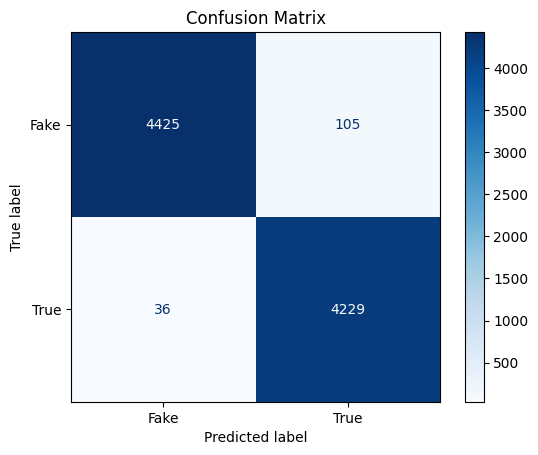

Classification Report:
               precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      4530
        True       0.98      0.99      0.98      4265

    accuracy                           0.98      8795
   macro avg       0.98      0.98      0.98      8795
weighted avg       0.98      0.98      0.98      8795



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming y_test contains the true labels for the test set
y_true = np.array(y_test)

# Convert predicted probabilities to binary labels
y_pred = np.array([1 if pred >= 0.5 else 0 for pred in model.predict(X_test_pad)])

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Generate and display the classification report
class_report = classification_report(y_true, y_pred, target_names=['Fake', 'True'])
print("Classification Report:\n", class_report)


In [ ]:
# Prepare a sample of test data
sample_test_data = [
    "Local School Holds Fundraiser for Children's Hospital.", # Fake News
    "The politician made a statement that caused controversy.", # Fake News
    "Scientists discover a new breakthrough in technology.", # Fake News
    "A suspicious article with misleading information.", # Fake News
    "(Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the stateâ€™s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. ",# True News
    "Scientists discover a new planet in our solar system.", # Fake News
    "Breaking: Political leader accused of corruption.", # Fake News
    "Health officials issue warning about a new virus outbreak.", # Fake News
    "Economic growth reaches record high, experts optimistic.", # Fake News
    "TEGUCIGALPA (Reuters) - Honduras  two main opposition parties on Friday presented formal requests to annul the results of the still-unresolved presidential election, deepening a political crisis that has roiled the poor, violent Central American nation.", # True News
  ]

# Tokenize and pad sequences for the sample test data
sample_test_sequences = tokenizer.texts_to_sequences(sample_test_data)
sample_test_pad = pad_sequences(sample_test_sequences, maxlen=max_len)

# Predict the labels for the sample test data
sample_predictions = model.predict(sample_test_pad)
sample_predictions_labels = [1 if pred >= 0.5 else 0 for pred in sample_predictions]

# Display the predicted labels for the sample test data
for i, text in enumerate(sample_test_data):
    label = "True" if sample_predictions_labels[i] == 1 else "Fake"
    print(f"Text: {text}\nPredicted Label: {label}\n{'-'*50}")



1/1 [==============================] - 0s 279ms/step
Text: Local School Holds Fundraiser for Children's Hospital.
Predicted Label: Fake
--------------------------------------------------
Text: The politician made a statement that caused controversy.
Predicted Label: Fake
--------------------------------------------------
Text: Scientists discover a new breakthrough in technology.
Predicted Label: Fake
--------------------------------------------------
Text: A suspicious article with misleading information.
Predicted Label: Fake
--------------------------------------------------
Text: (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the stateâ€™s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. 
Predicted Label: True
--------------------